In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Titanic - Machine Learning from Disaster ( kaggel Competition )
## The competition is use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
train_data = pd.read_csv(r'train.csv')
test_data = pd.read_csv(r'test.csv')

## 1. Explore Data

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.shape
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
null_data = train_data.isnull().sum()
null_data[null_data > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:>

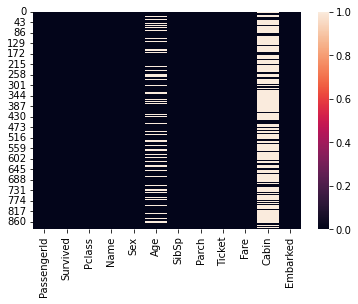

In [10]:
sns.heatmap(train_data.isnull())

## 2. Cleaning Data

In [11]:
def clean(df):
    df.drop(['Cabin','Name','Ticket','Embarked','Fare'],axis=1,inplace=True)
    df.Age = df.Age.fillna(df.Age.median())
    df.dropna()
    
    return df

In [12]:
clean(train_data)
clean(test_data)

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0
414,1306,1,female,39.0,0,0
415,1307,3,male,38.5,0,0
416,1308,3,male,27.0,0,0


In [13]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,28.0,1,2
889,890,1,1,male,26.0,0,0


<AxesSubplot:>

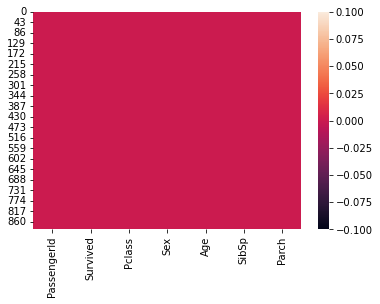

In [14]:
sns.heatmap(train_data.isnull())

## 3. Data Analysis

<AxesSubplot:ylabel='Sex'>

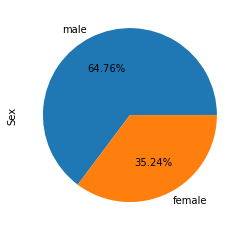

In [15]:
train_data.Sex.value_counts().plot.pie(autopct = "%0.2f%%") 

In [16]:
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

## 4. Processing Data

In [18]:
train_data.Sex = pd.get_dummies(train_data.Sex, drop_first=True)
test_data.Sex = pd.get_dummies(test_data.Sex, drop_first=True)

In [19]:
train_data.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
834,835,0,3,1,18.0,0,0
282,283,0,3,1,16.0,0,0
63,64,0,3,1,4.0,3,2
621,622,1,1,1,42.0,1,0
272,273,1,2,0,41.0,0,1


## 5. modeling

In [42]:
X = train_data.drop(['Survived'],axis=1)
y = train_data.Survived

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [56]:
y_test.value_counts()

0    100
1     79
Name: Survived, dtype: int64

In [44]:
accuracies = []

In [45]:
def modeling(model):
    model.fit(X_train,y_train)
    pre = model.predict(X_test)
    accuracy = accuracy_score(pre,y_test)
    print('Accuracy is : ',accuracy)
    accuracies.append(accuracy)
    
    cm = confusion_matrix(y_test,pre)
 
    #Plot the confusion matrix.
    sns.heatmap(cm,
                annot=True,
                fmt='g',
                xticklabels=['Survived','Not Survived'],
                yticklabels=['Survived','Not Survived'])
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Confusion Matrix',fontsize=17)
    plt.show()
    

In [46]:
Algorithm = ['LogisticRegression','RandomForestClassifier','GradientBoostingClassifier','DecisionTreeClassifie','KNeighborsClassifier', 'GaussianNB', 'SVC']

Accuracy is :  0.7932960893854749


C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


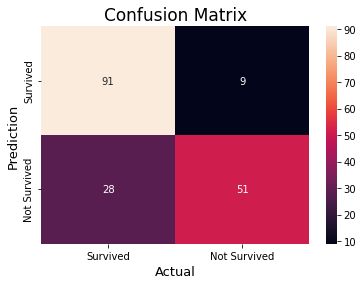

In [47]:
model1 = LogisticRegression(max_iter=100)
modeling(model1)

Accuracy is :  0.7597765363128491


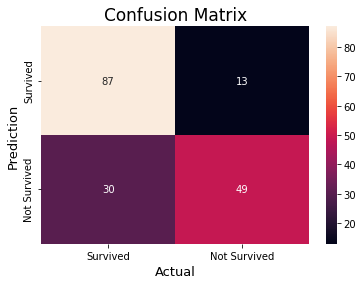

In [48]:
model2 = RandomForestClassifier()
modeling(model2)

Accuracy is :  0.7988826815642458


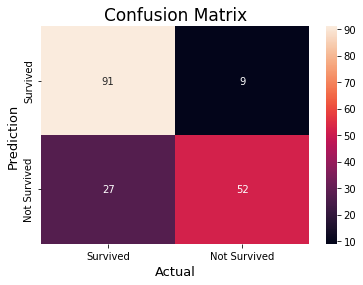

In [49]:
model3 = GradientBoostingClassifier()
modeling(model3)

Accuracy is :  0.7262569832402235


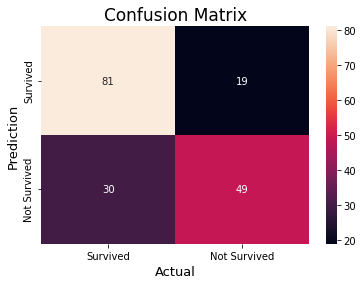

In [50]:
model4 = DecisionTreeClassifier()
modeling(model4)

Accuracy is :  0.5251396648044693


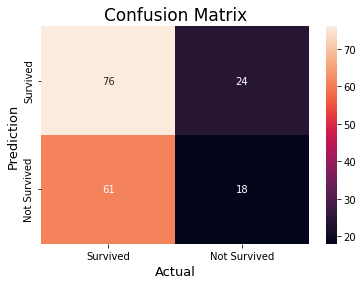

In [51]:
model5 = KNeighborsClassifier()
modeling(model5)

Accuracy is :  0.7653631284916201


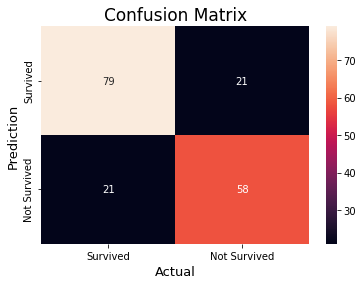

In [52]:
model6 = GaussianNB()
modeling(model6)

Accuracy is :  0.5586592178770949


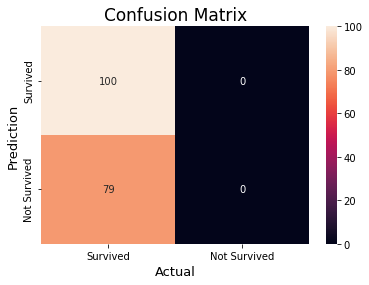

In [53]:
model7 = SVC()
modeling(model7)

In [32]:
len(accuracies)

7

In [33]:
models = pd.DataFrame({'Algorithm':Algorithm,'Score':accuracies})
models

,Algorithm,Score
0,LogisticRegression,0.782123
1,RandomForestClassifier,0.787709
2,GradientBoostingClassifier,0.810056
3,DecisionTreeClassifie,0.765363
4,KNeighborsClassifier,0.575419
5,GaussianNB,0.765363
6,SVC,0.597765


## Best Algorithm (GradientBoostingClassifier)

In [35]:
best_model = GradientBoostingClassifier()
best_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [36]:
result = best_model.predict(test_data)

In [161]:
final = test_data.PassengerId
final

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [163]:
df=pd.DataFrame({'PassengerId':final,'Survived':result})

In [164]:
df.to_csv('output.csv',index=False)